<a href="https://colab.research.google.com/github/Zuuru/Computer-Vision/blob/main/Image%20clarification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zulfikri Arya Putra Ismail - 4.33.24.2.25

##Jobsheet 2 - Klasifikasi Gambar

Import dataset

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-dataset' dataset.
Path to dataset files: /kaggle/input/mnist-dataset


Praktikum 1 - Memulai Klasifikasi Gambar (MNIST)

---


Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


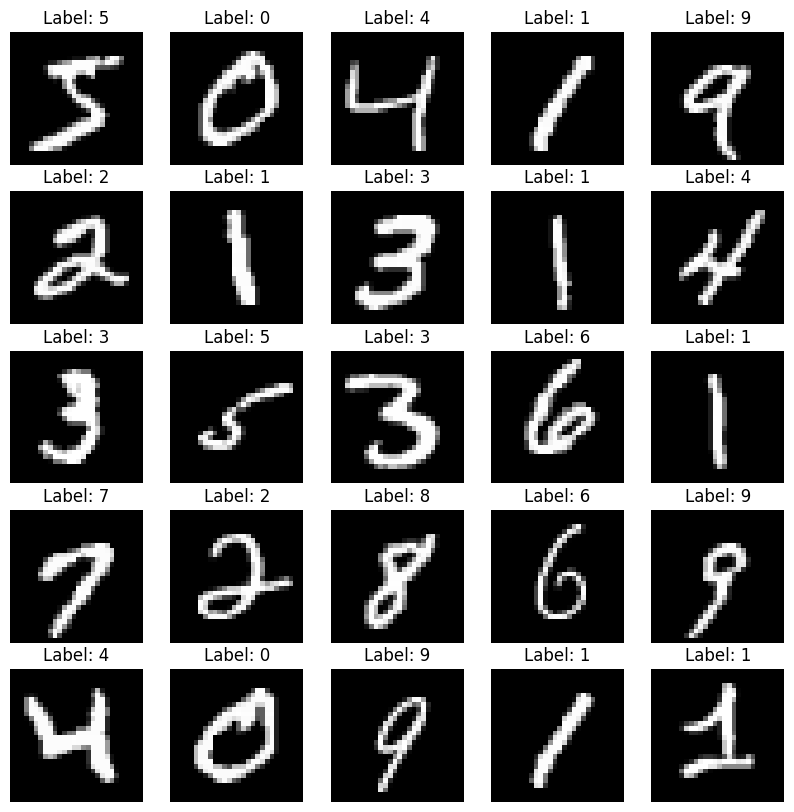

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan beberapa contoh
plt.figure(figsize=(10,10)) # Ukuran figure diperbesar
for i in range(25): # Mengubah range menjadi 25
    plt.subplot(5,5,i+1) # Mengubah layout menjadi 5x5
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Praktikum 2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

---

Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap akurasi?

In [8]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM dengan kernel RBF
clf = svm.SVC(kernel='rbf', gamma='scale') #mengubah ke kernel rbf
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


Praktikum 3 - CNN Sederhana (MNIST)

---

Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.9097 - loss: 0.2933 - val_accuracy: 0.9842 - val_loss: 0.0583
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9902 - val_loss: 0.0379
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9910 - loss: 0.0262 - val_accuracy: 0.9907 - val_loss: 0.0372
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9890 - val_loss: 0.0508
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9905 - val_loss: 0.0446


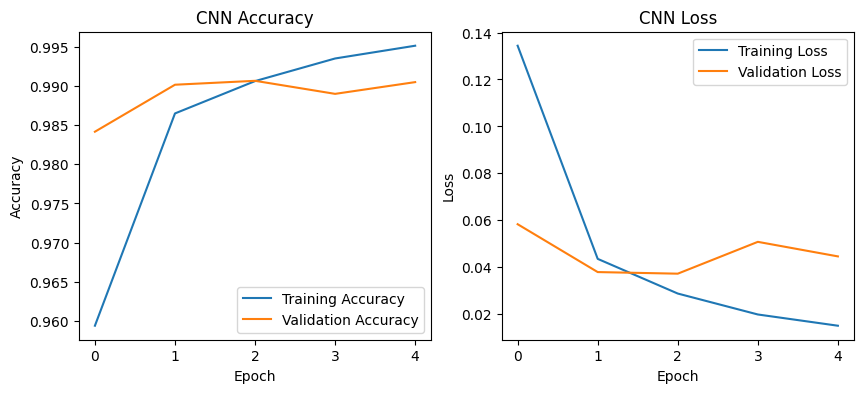

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Normalisasi dan reshape
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Model CNN dengan tambahan Conv2D
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),   #tambahan lapisan Conv2D
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum 4 - CNN dengan Dataset CIFAR-10 (RGB)

---

Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa pengaruhnya pada overfitting?

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.3016 - loss: 1.8991 - val_accuracy: 0.4902 - val_loss: 1.4362
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.4771 - loss: 1.4488 - val_accuracy: 0.5792 - val_loss: 1.2415
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.5246 - loss: 1.3225 - val_accuracy: 0.6156 - val_loss: 1.1044
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.5599 - loss: 1.2356 - val_accuracy: 0.6322 - val_loss: 1.0892
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5776 - loss: 1.1822 - val_accuracy: 0.6614 - val_loss: 0.9838
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.5933 - loss: 1.1395 - val_accuracy: 0.6626 - val_loss: 0.9719
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.6105 - loss: 1.0896 - val_accuracy: 0.6702 - val_loss: 0.9567
Epoch 8/10
1407/1407 ━

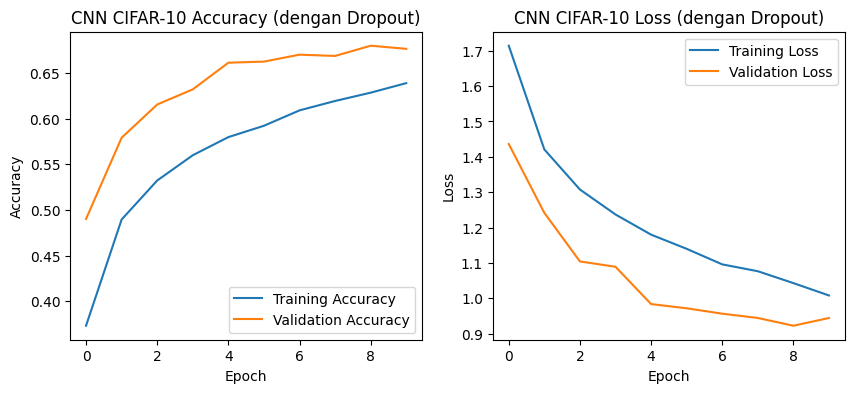

In [22]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model CNN dengan Dropout
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),              # Dropout ditambahkan di sini
    layers.Dense(10, activation='softmax')
])

# Compile & Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy (dengan Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss (dengan Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum 5 - Transfer Learning (VGG16/ResNet50)

---

Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana akurasinya berubah?

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 712s 505ms/step - accuracy: 0.4484 - loss: 1.5563 - val_accuracy: 0.5742 - val_loss: 1.2117
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 726s 493ms/step - accuracy: 0.5765 - loss: 1.2032 - val_accuracy: 0.5746 - val_loss: 1.1931
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 742s 494ms/step - accuracy: 0.6038 - loss: 1.1411 - val_accuracy: 0.5984 - val_loss: 1.1520
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 741s 493ms/step - accuracy: 0.6174 - loss: 1.0980 - val_accuracy: 0.6124 - val_loss: 1.1161
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 756s 503ms/step - accuracy: 0.6293 - loss: 1.0593 - val_accuracy: 0.6044 - val_loss: 1.1211
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 764s 542ms/step - accuracy: 0.6538 - loss: 0.9928 - val_accuracy: 0.6408 - val_loss: 1.0235
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 801s 541ms/step - accuracy: 0.6892 - loss: 0.8962 - val_accuracy: 0.6538 - val_loss: 0.9976
Epoch 3/5
1407/140

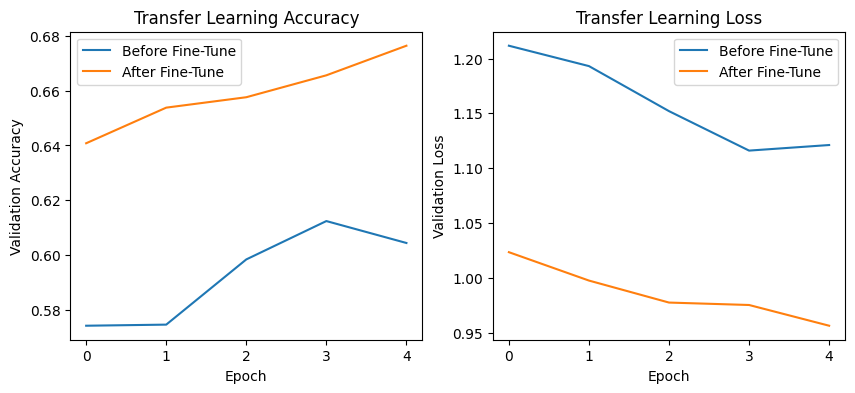

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load VGG16 tanpa top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze semua layer dulu
base_model.trainable = False

# Buat model awal (hanya classifier di atas feature extractor)
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Training awal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# === Fine-tuning: aktifkan beberapa layer terakhir ===
base_model.trainable = True
for layer in base_model.layers[:-2]:   # ❗ freeze semua kecuali 2 layer terakhir
    layer.trainable = False

# Re-compile dengan learning rate lebih kecil supaya stabil
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(1e-5),    # lr lebih kecil
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'], label='Before Fine-Tune')
plt.plot(history_finetune.history['val_accuracy'], label='After Fine-Tune')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['val_loss'], label='Before Fine-Tune')
plt.plot(history_finetune.history['val_loss'], label='After Fine-Tune')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()


Praktikum 6 - Evaluasi dengan Confusion Matrix

---

Dari confusion matrix, identifikasi kelas apa yang paling sering salah diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi?

313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 450ms/step
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1000
           1       0.75      0.73      0.74      1000
           2       0.58      0.59      0.58      1000
           3       0.48      0.47      0.47      1000
           4       0.62      0.58      0.60      1000
           5       0.57      0.56      0.57      1000
           6       0.63      0.76      0.69      1000
           7       0.74      0.70      0.72      1000
           8       0.82      0.75      0.78      1000
           9       0.70      0.72      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



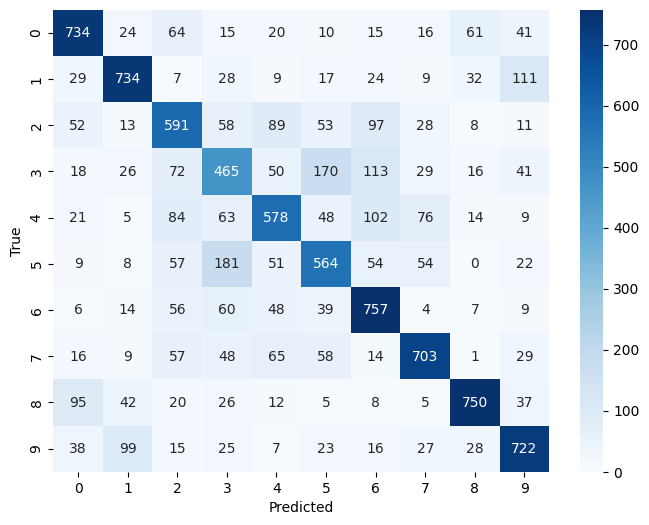

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred = model.predict(x_test).argmax(axis=1)

# Report klasifikasi
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Penugasan

Saving 3 bold.jpg to 3 bold.jpg


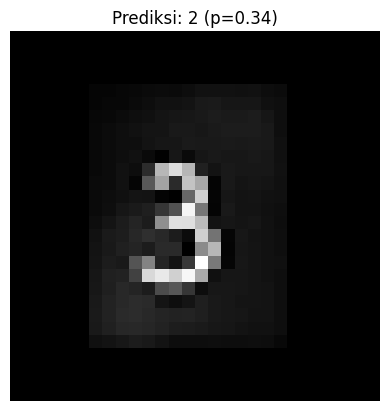

3 bold.jpg -> Prediksi 2 (p=0.337)


In [34]:
from google.colab import files
from PIL import Image, ImageOps

uploaded = files.upload()

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')          # grayscale
    img = ImageOps.autocontrast(img)    # tingkatkan kontras
    arr = np.array(img)
    if arr.mean() > 127:                # invert jika background putih
        img = ImageOps.invert(img)
        arr = np.array(img)
    # crop digit
    mask = arr > arr.mean()*0.8
    if mask.any():
        ys, xs = np.where(mask)
        img = img.crop((xs.min(), ys.min(), xs.max()+1, ys.max()+1))
    # resize ke 20x20
    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w,h = img.size
    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))
    arr = np.array(canvas).astype('float32')/255.0
    arr = arr[...,None]   # (28,28,1)
    return canvas, arr

# Prediksi dengan CNN
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)
    x_batch = np.expand_dims(x, axis=0)
    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()
    print(f"{fname} -> Prediksi {pred} (p={conf:.3f})")
